Skin-Lesion Segmentation

Mount the drive

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data set link:
https://www.kaggle.com/datasets/athina123/ph2dataset?select=ph2_dataset

In [95]:
image_directory = '/content/drive/MyDrive/Skin-lesson-seg/ph2_dataset/'

### Importing the Libraries

In [96]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
import os
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
np.random.seed(101)

In [97]:
print(os.listdir('/content/drive/MyDrive/Skin-lesson-seg/ph2_dataset/'))

['trainx', 'trainy']


## Load the data
Defining a function to load the data in sorted order

In [98]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

*  First we  load the filenames in a list.  

In [99]:
filelist_trainx_ph2 = sorted(glob.glob('/content/drive/MyDrive/Skin-lesson-seg/ph2_dataset/trainx/*.bmp'), key=numericalSort)
X_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainx_ph2])

filelist_trainy_ph2 = sorted(glob.glob('/content/drive/MyDrive/Skin-lesson-seg/ph2_dataset/trainy/*.bmp'), key=numericalSort)
Y_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainy_ph2])

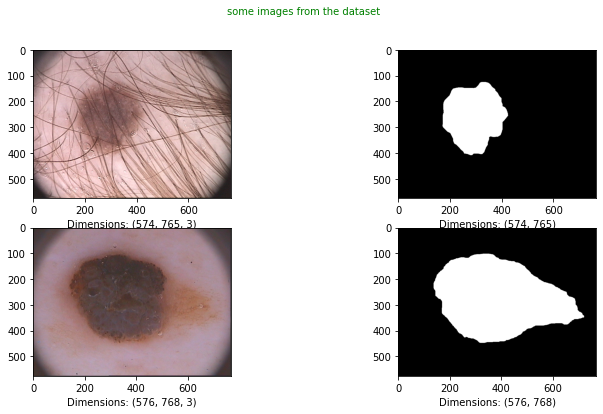

In [100]:
plt.figure(figsize=(12,6))

plt.suptitle('some images from the dataset', fontsize = 10, color='green')
 
plt.subplot(2,2,1)
plt.imshow(X_train_ph2[1])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2[1]).shape))
plt.subplot(2,2,2)
plt.imshow(Y_train_ph2[1], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2[1]).shape))

plt.subplot(2,2,3)
plt.imshow(X_train_ph2[112])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2[185]).shape))
plt.subplot(2,2,4)
plt.imshow(Y_train_ph2[112], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2[185]).shape))
plt.show()

#### Resizing

In [101]:
def resize(filename, size = (256,192)):
    im = Image.open(filename)
    im_resized = im.resize(size, Image.ANTIALIAS)
    return (im_resized)

In [102]:
X_train_ph2_resized = []
Y_train_ph2_resized = []

for i in range(len(filelist_trainx_ph2)):
    X_train_ph2_resized.append(resize(filelist_trainx_ph2[i]))
    Y_train_ph2_resized.append(resize(filelist_trainy_ph2[i]))    
    
    


 resized images

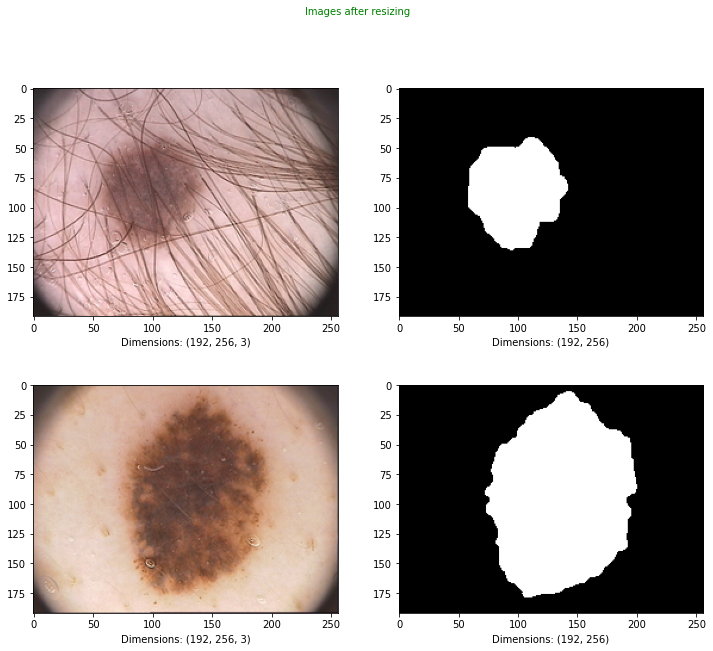

In [103]:
plt.figure(figsize=(12,10))

plt.suptitle('Images after resizing', fontsize = 10, color='green')

plt.subplot(2,2,1)
plt.imshow(X_train_ph2_resized[1])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2_resized[1]).shape))
plt.subplot(2,2,2)
plt.imshow(Y_train_ph2_resized[1], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2_resized[1]).shape))

plt.subplot(2,2,3)
plt.imshow(X_train_ph2_resized[117])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2_resized[185]).shape))
plt.subplot(2,2,4)
plt.imshow(Y_train_ph2_resized[117], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2_resized[185]).shape))
plt.show()


 Transformed Images into numpy arrays

In [104]:
X_train_ph2 = np.array([np.array(img) for img in X_train_ph2_resized])
Y_train_ph2 = np.array([np.array(img) for img in Y_train_ph2_resized])

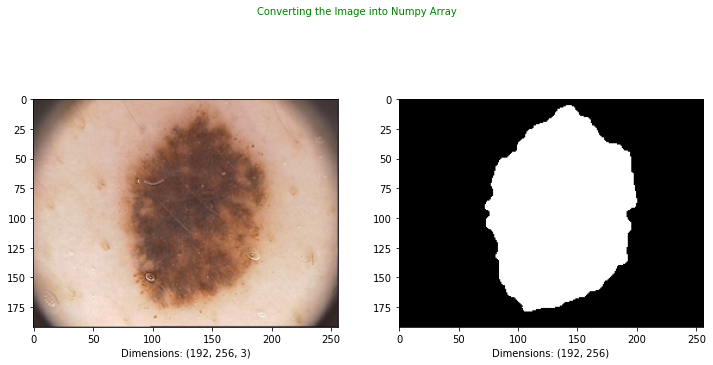

In [105]:
plt.figure(figsize=(12,6))

plt.suptitle('Converting the Image into Numpy Array', fontsize = 10, color='green')

plt.subplot(1,2,1)
plt.imshow(X_train_ph2[117])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2_resized[180]).shape))
plt.subplot(1,2,2)
plt.imshow(Y_train_ph2[117], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2_resized[180]).shape))

plt.show()

* Splitting the dataset into training set and test set

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_train_ph2, Y_train_ph2, test_size = 0.25, random_state = 101)

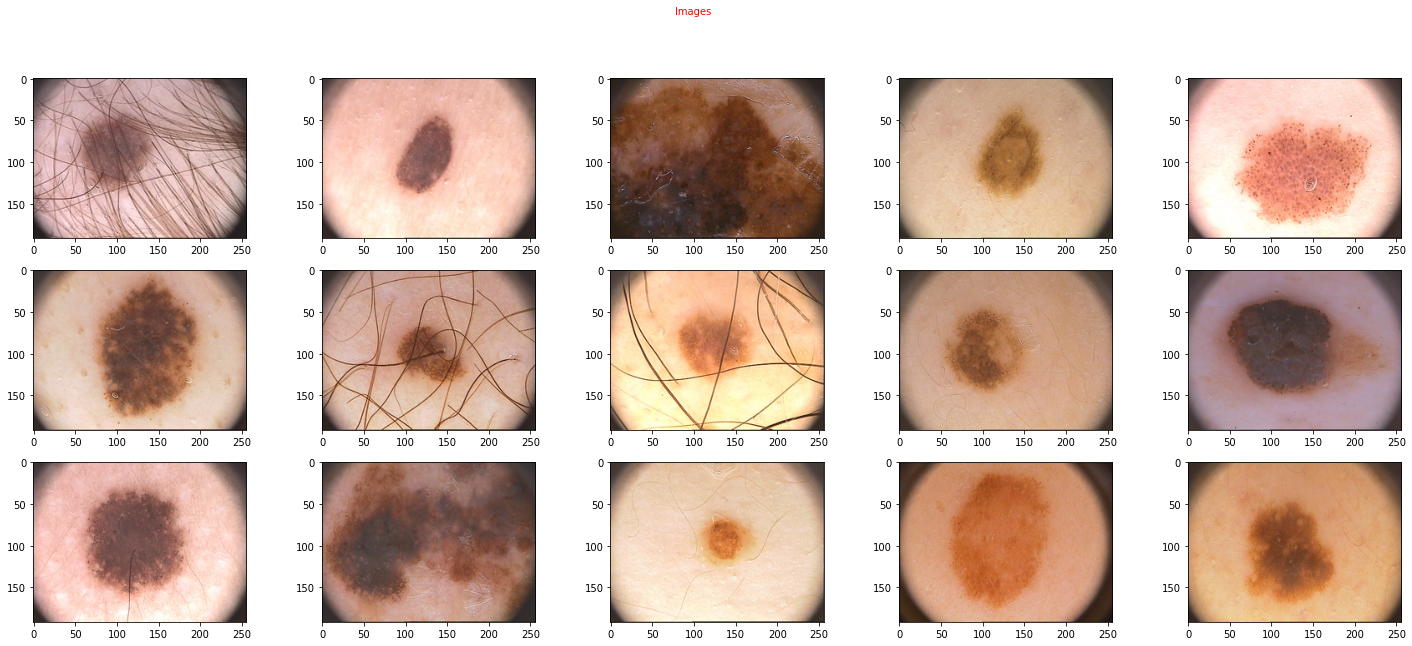

In [107]:
plt.figure(figsize=(25,10))

plt.suptitle('Images ', fontsize = 10, color='red')

plt.subplot(3,5,1)
plt.imshow(X_train_ph2[1])
plt.subplot(3,5,2)
plt.imshow(X_train_ph2[12])
plt.subplot(3,5,3)
plt.imshow(X_train_ph2[44])
plt.subplot(3,5,4)
plt.imshow(X_train_ph2[67])
plt.subplot(3,5,5)
plt.imshow(X_train_ph2[100])
plt.subplot(3,5,6)
plt.imshow(X_train_ph2[117])
plt.subplot(3,5,7)
plt.imshow(X_train_ph2[128])
plt.subplot(3,5,8)
plt.imshow(X_train_ph2[147])
plt.subplot(3,5,9)
plt.imshow(X_train_ph2[132])
plt.subplot(3,5,10)
plt.imshow(X_train_ph2[112])
plt.subplot(3,5,11)
plt.imshow(X_train_ph2[31])
plt.subplot(3,5,12)
plt.imshow(X_train_ph2[52])
plt.subplot(3,5,13)
plt.imshow(X_train_ph2[74])
plt.subplot(3,5,14)
plt.imshow(X_train_ph2[86])
plt.subplot(3,5,15)
plt.imshow(X_train_ph2[150])
plt.show()

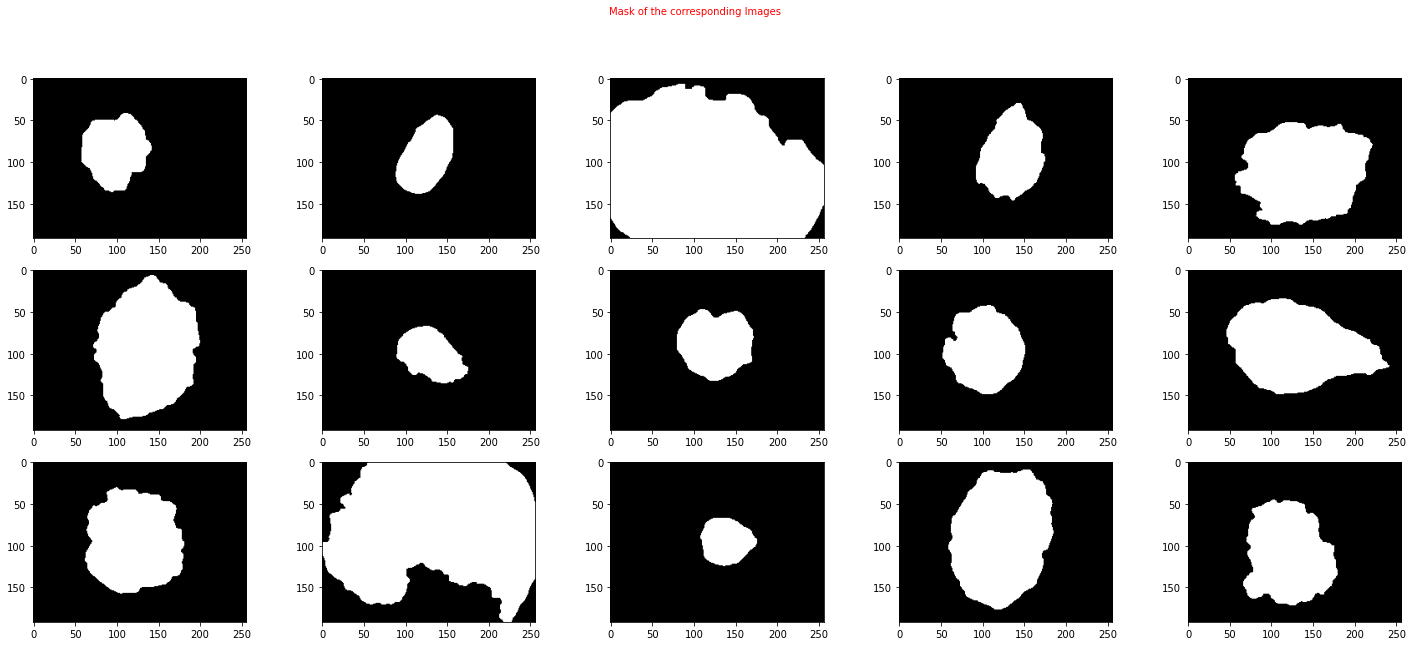

In [108]:
plt.figure(figsize=(25,10))

plt.suptitle('Mask of the corresponding Images', fontsize = 10, color='red')

plt.subplot(3,5,1)
plt.imshow(Y_train_ph2[1], cmap = plt.cm.binary_r)
plt.subplot(3,5,2)
plt.imshow(Y_train_ph2[12], cmap = plt.cm.binary_r)
plt.subplot(3,5,3)
plt.imshow(Y_train_ph2[44], cmap = plt.cm.binary_r)
plt.subplot(3,5,4)
plt.imshow(Y_train_ph2[67], cmap = plt.cm.binary_r)
plt.subplot(3,5,5)
plt.imshow(Y_train_ph2[100], cmap = plt.cm.binary_r)
plt.subplot(3,5,6)
plt.imshow(Y_train_ph2[117], cmap = plt.cm.binary_r)
plt.subplot(3,5,7)
plt.imshow(Y_train_ph2[128], cmap = plt.cm.binary_r)
plt.subplot(3,5,8)
plt.imshow(Y_train_ph2[147], cmap = plt.cm.binary_r)
plt.subplot(3,5,9)
plt.imshow(Y_train_ph2[132], cmap = plt.cm.binary_r)
plt.subplot(3,5,10)
plt.imshow(Y_train_ph2[112], cmap = plt.cm.binary_r)
plt.subplot(3,5,11)
plt.imshow(Y_train_ph2[31], cmap = plt.cm.binary_r)
plt.subplot(3,5,12)
plt.imshow(Y_train_ph2[52], cmap = plt.cm.binary_r)
plt.subplot(3,5,13)
plt.imshow(Y_train_ph2[74], cmap = plt.cm.binary_r)
plt.subplot(3,5,14)
plt.imshow(Y_train_ph2[86], cmap = plt.cm.binary_r)
plt.subplot(3,5,15)
plt.imshow(Y_train_ph2[150], cmap = plt.cm.binary_r)

plt.show()

## Image Augmentation
We did augmentation by orizontal flipping , vertical flipping, both flipped and random rotation

In [109]:
def horizontal_flip(x_image, y_image):
    x_image = cv2.flip(x_image, 1)
    y_image = cv2.flip(y_image.astype('float32'), 1)
    return x_image, y_image.astype('int')

def vertical_flip(x_image, y_image):
    x_image = cv2.flip(x_image, 0)
    y_image = cv2.flip(y_image.astype('float32'), 0)
    return x_image, y_image.astype('int')

def both_flip(x_image, y_image):
    x_image = cv2.flip(x_image, -1)
    y_image = cv2.flip(y_image.astype('float32'), -1)
    return x_image, y_image.astype('int')

def random_rotation(x_image, y_image):
    rows_x,cols_x, chl_x = x_image.shape
    rows_y,cols_y = y_image.shape
    rand_num = np.random.randint(-60,60)
    M1 = cv2.getRotationMatrix2D((cols_x/2,rows_x/2),rand_num,1)
    M2 = cv2.getRotationMatrix2D((cols_y/2,rows_y/2),rand_num,1)
    x_image = cv2.warpAffine(x_image,M1,(cols_x,rows_x))
    y_image = cv2.warpAffine(y_image.astype('float32'),M2,(cols_y,rows_y))
    return np.array(x_image), np.array(y_image.astype('int'))

In [110]:
def img_augmentation(x_train, y_train):
    x_flip = []
    y_flip = []
    x_vert = []
    y_vert = []
    x_both = []
    y_both = []
    x_rotat = []
    y_rotat = []
    
    for idx in range(len(x_train)):
        
        x,y = horizontal_flip(x_train[idx], y_train[idx])
        x_flip.append(x)
        y_flip.append(y)
        
        x,y = vertical_flip(x_train[idx], y_train[idx])
        x_vert.append(x)
        y_vert.append(y)
        
        x,y = both_flip(x_train[idx], y_train[idx])
        x_both.append(x)
        y_both.append(y)
        
        x,y = random_rotation(x_train[idx], y_train[idx])
        x_rotat.append(x)
        y_rotat.append(y)
        

        
    return  np.array(x_flip), np.array(y_flip), np.array(x_vert), np.array(y_vert), np.array(x_both), np.array(y_both), np.array(x_rotat), np.array(y_rotat)

calling the functions for the training data.

In [111]:
x_flipped, y_flipped, x_vertical, y_vertical, x_bothed, y_bothed, x_rotated, y_rotated = img_augmentation(x_train, y_train)
x_flipped_t, y_flipped_t, x_vertical_t, y_vertical_t, x_bothed_t, y_bothed_t,  x_rotated_t, y_rotated_t  = img_augmentation(x_test, y_test)

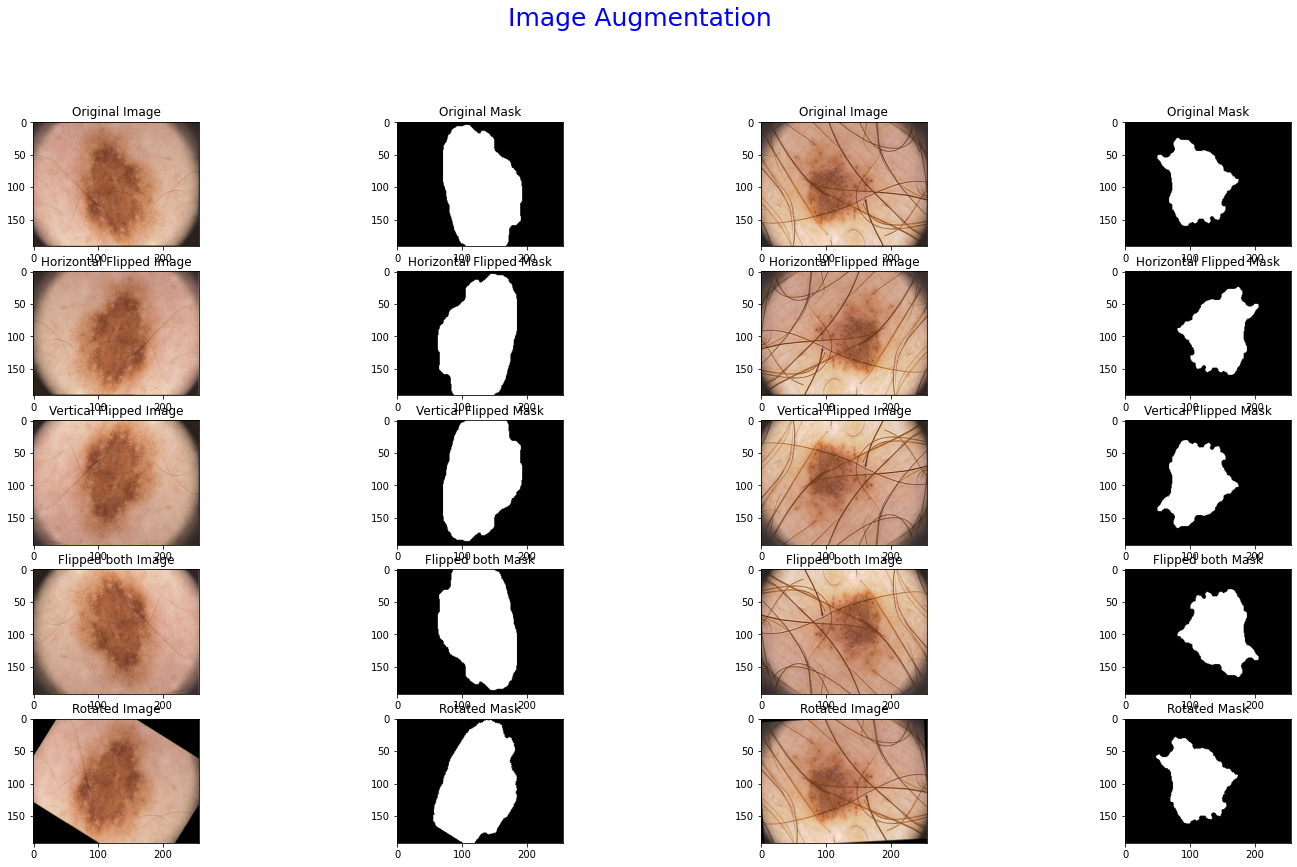

In [112]:
plt.figure(figsize=(25,16))

plt.suptitle('Image Augmentation', fontsize = 25, color='blue')

plt.subplot(6,4,1)
plt.imshow(x_train[112])
plt.title('Original Image')
plt.subplot(6,4,2)
plt.imshow(y_train[112], plt.cm.binary_r)
plt.title('Original Mask')
plt.subplot(6,4,3)
plt.imshow(x_train[12])
plt.title('Original Image')
plt.subplot(6,4,4)
plt.imshow(y_train[12], plt.cm.binary_r)
plt.title('Original Mask')

plt.subplot(6,4,5)
plt.imshow(x_flipped[112])
plt.title('Horizontal Flipped Image')
plt.subplot(6,4,6)
plt.imshow(y_flipped[112], plt.cm.binary_r)
plt.title('Horizontal Flipped Mask')
plt.subplot(6,4,7)
plt.imshow(x_flipped[12])
plt.title('Horizontal Flipped Image')
plt.subplot(6,4,8)
plt.imshow(y_flipped[12], plt.cm.binary_r)
plt.title('Horizontal Flipped Mask')

plt.subplot(6,4,9)
plt.imshow(x_vertical[112])
plt.title('Vertical Flipped Image')
plt.subplot(6,4,10)
plt.imshow(y_vertical[112], plt.cm.binary_r)
plt.title('Vertical Flipped Mask')
plt.subplot(6,4,11)
plt.imshow(x_vertical[12])
plt.title('Vertical Flipped Image')
plt.subplot(6,4,12)
plt.imshow(y_vertical[12], plt.cm.binary_r)
plt.title('Vertical Flipped Mask')

plt.subplot(6,4,13)
plt.imshow(x_bothed[112])
plt.title('Flipped both Image')
plt.subplot(6,4,14)
plt.imshow(y_bothed[112], plt.cm.binary_r)
plt.title('Flipped both Mask')
plt.subplot(6,4,15)
plt.imshow(x_bothed[12])
plt.title('Flipped both Image')
plt.subplot(6,4,16)
plt.imshow(y_bothed[12], plt.cm.binary_r)
plt.title('Flipped both Mask')

plt.subplot(6,4,17)
plt.imshow(x_rotated[112])
plt.title('Rotated Image')
plt.subplot(6,4,18)
plt.imshow(y_rotated[112], plt.cm.binary_r)
plt.title('Rotated Mask')
plt.subplot(6,4,19)
plt.imshow(x_rotated[12])
plt.title('Rotated Image')
plt.subplot(6,4,20)
plt.imshow(y_rotated[12], plt.cm.binary_r)
plt.title('Rotated Mask')


plt.show()


Now we join all the augmentations image arrays to the original training arrays.

In [113]:
# For training Set
x_train_full = np.concatenate([x_train, x_rotated, x_flipped, x_bothed, x_vertical])
y_train_full = np.concatenate([y_train, y_rotated, y_flipped, y_bothed, y_vertical])

## Defining Evaluation Metrics

## Intersection over Union(IOU) or Jaccard Index


Jaccard index is popular the area of overlap J is
calculated between the segmented binary image A and its ground truth G as shown:
*J = |A ∩ G| / |A ∪ G| × 100%.*

In [114]:
def iou(y_true, y_pred, smooth = 100):
    
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    union = sum_ - intersection
    jac = (intersection + smooth) / (union + smooth)
    return jac

## Dice Coefficient


The Dice coefficient can be defined as: *D = 2 |A ∩ G| / |A + G| × 100%* where A is the algorithm
output and G is the ground truth.

In [115]:
def dice_coef(y_true, y_pred, smooth = 100):
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

## Precision


*Precision = true-positive / (true-positive + false-positive)*



In [116]:
def precision(y_true, y_pred):
   
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

## Difinying Recall


*Recall = true-positive /(true-positive + false negative)*


In [117]:
def recall(y_true, y_pred):
   
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#### Defining Accuracy

In [119]:
def accuracy(y_true, y_pred):
    
    return K.mean(K.equal(y_true, K.round(y_pred)))

#### Data set splitting

In [120]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.20, random_state = 101)

In [121]:
print("Length of the Training Set   : {}".format(len(x_train)))
print("Length of the Test Set       : {}".format(len(x_test)))
print("Length of the Validation Set : {}".format(len(x_val)))

Length of the Training Set   : 600
Length of the Test Set       : 50
Length of the Validation Set : 150


# Model Function
SegNet, a deep convolutional network architecture for semantic segmentation. 

In [122]:
def segnet(epochs_num,savename):

    # Encoding layer
    
    img_input = Input(shape= (192, 256, 3))
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name='fc1')(x)
    x = Dense(1024, activation = 'relu', name='fc2')(x)
    
    # Decoding Layer 
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    pred = Reshape((192,256))(x)
    
    
    model = Model(inputs=img_input, outputs=pred)
     
    model.compile(optimizer= Adam(lr = 0.003), loss= ['binary_crossentropy']
                  , metrics=[iou, dice_coef, precision, recall, accuracy])
    
    model.summary()
    hist = model.fit(x_train, y_train, epochs= epochs_num, batch_size= 32, validation_data= (x_val, y_val), verbose=1)
    
    model.save(savename)
    return model,hist

## Load Model

In [59]:
# Encoding layer

img_input = Input(shape= (192, 256, 3))
x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
x = BatchNormalization(name='bn1')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
x = BatchNormalization(name='bn2')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
x = BatchNormalization(name='bn3')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
x = BatchNormalization(name='bn4')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
x = BatchNormalization(name='bn5')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
x = BatchNormalization(name='bn6')(x)
x = Activation('relu')(x)
x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
x = BatchNormalization(name='bn7')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
x = BatchNormalization(name='bn8')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
x = BatchNormalization(name='bn9')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
x = BatchNormalization(name='bn10')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
x = BatchNormalization(name='bn11')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
x = BatchNormalization(name='bn12')(x)
x = Activation('relu')(x)
x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
x = BatchNormalization(name='bn13')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Dense(1024, activation = 'relu', name='fc1')(x)
x = Dense(1024, activation = 'relu', name='fc2')(x)

# Decoding Layer 

x = UpSampling2D()(x)
x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
x = BatchNormalization(name='bn14')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
x = BatchNormalization(name='bn15')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
x = BatchNormalization(name='bn16')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
x = BatchNormalization(name='bn17')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
x = BatchNormalization(name='bn18')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
x = BatchNormalization(name='bn19')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
x = BatchNormalization(name='bn20')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
x = BatchNormalization(name='bn21')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
x = BatchNormalization(name='bn22')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
x = BatchNormalization(name='bn23')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
x = BatchNormalization(name='bn24')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
x = BatchNormalization(name='bn25')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
x = BatchNormalization(name='bn26')(x)
x = Activation('sigmoid')(x)
pred = Reshape((192,256))(x)


> ## Tain on 120 epochs

In [60]:
model, hist = segnet(epochs_num= 120, savename= 'segnet_120_epoch.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 192, 256, 64)      1792      
                                                                 
 bn1 (BatchNormalization)    (None, 192, 256, 64)      256       
                                                                 
 activation_26 (Activation)  (None, 192, 256, 64)      0         
                                                                 
 conv2 (Conv2D)              (None, 192, 256, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 192, 256, 64)      256       
                                                                 
 activation_27 (Activation)  (None, 192, 256, 64)      0     

In [61]:
model_1 = Model(inputs=img_input, outputs=pred)
model_1.compile(optimizer= Adam(lr = 0.003), loss= ['binary_crossentropy']
              , metrics=[iou, dice_coef, precision, recall, accuracy])

In [62]:
model_1.load_weights('segnet_120_epoch.h5')

In [63]:
print('\n~~~~~~~~~~~~~~~Stats after 120 epoch~~~~~~~~~~~~~~~~~~~')
print('\n------------------On Train Set-----------------------------\n')
res = model_1.evaluate(x_train, y_train, batch_size = 48)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')
print('\n-----------------On Test  Set-----------------------------\n')
res = model_1.evaluate(x_test, y_test, batch_size = 48)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')
print('\n----------------On validation Set-----------------------------\n')
res = model_1.evaluate(x_val, y_val, batch_size = 48)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')


~~~~~~~~~~~~~~~Stats after 120 epoch~~~~~~~~~~~~~~~~~~~

------------------On Train Set-----------------------------

13/13 [==============================] - 13s 460ms/step - loss: 0.0471 - iou: 0.9832 - dice_coef: 0.9498 - precision: 0.9671 - recall: 0.9804 - accuracy: 0.9832
________________________
IOU:       |   98.32  |
Dice Coef: |   94.98  |
Precision: |   96.71  |
Recall:    |   98.04  |
Accuracy:  |   98.32  |
Loss:      |   4.71  |
________________________

-----------------On Test  Set-----------------------------

2/2 [==============================] - 2s 1s/step - loss: 0.1148 - iou: 0.9587 - dice_coef: 0.9130 - precision: 0.9209 - recall: 0.9636 - accuracy: 0.9724
________________________
IOU:       |   95.87  |
Dice Coef: |   91.30  |
Precision: |   92.09  |
Recall:    |   96.36  |
Accuracy:  |   97.24  |
Loss:      |   11.48  |
________________________

----------------On validation Set-----------------------------

4/4 [==============================] - 3s 808ms/step

###  Training Statistics

Text(0.5, 1.0, 'Jaccard Index')

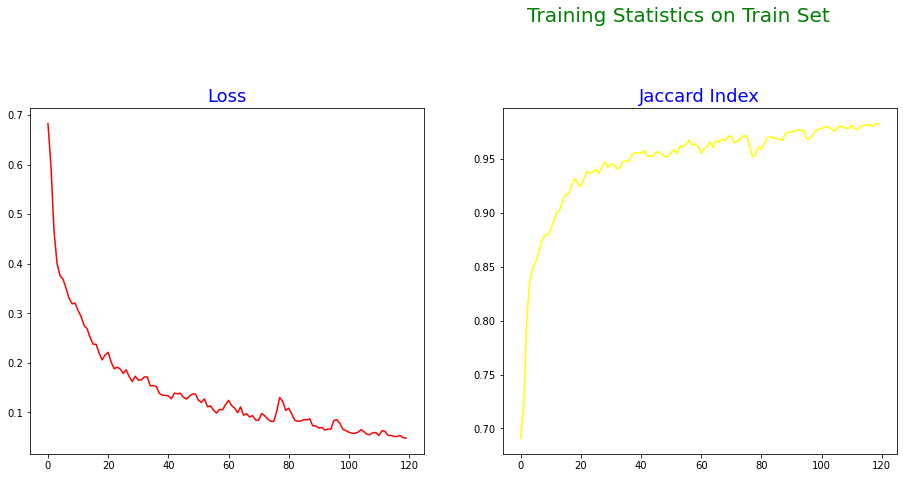

In [77]:
plt.figure(figsize=(24, 14))

plt.suptitle('Training Statistics on Train Set', fontsize = 20, color='green')

plt.subplot(2,3,1)
plt.plot(hist.history['loss'], 'red')
plt.title('Loss',fontsize = 18, color='blue')
plt.subplot(2,3,2)
plt.plot(hist.history['iou'], 'yellow')
plt.title('Jaccard Index',fontsize = 18, color='blue')


Text(0.5, 1.0, 'Valdiation Loss')

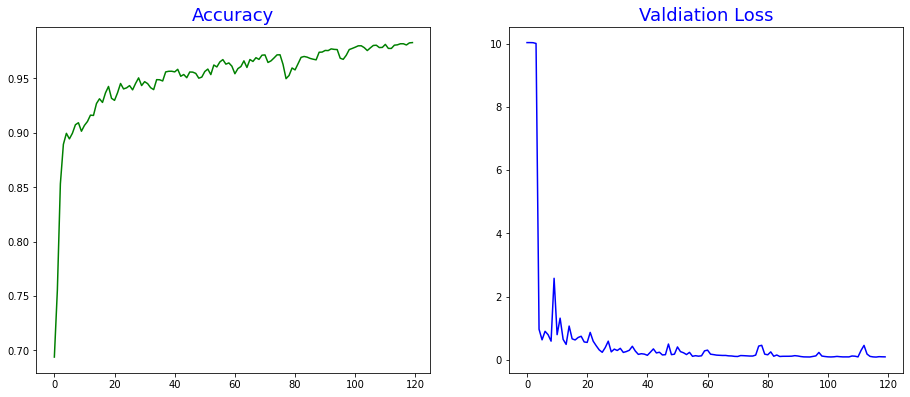

In [83]:
plt.figure(figsize=(24, 14))

plt.subplot(2,3,1)
plt.plot(hist.history['accuracy'], 'green')
plt.title('Accuracy',fontsize = 18, color='blue')

plt.subplot(2,3,2)
plt.plot(hist.history['val_loss'], 'blue')
#plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Valdiation Loss',fontsize = 18, color='blue')


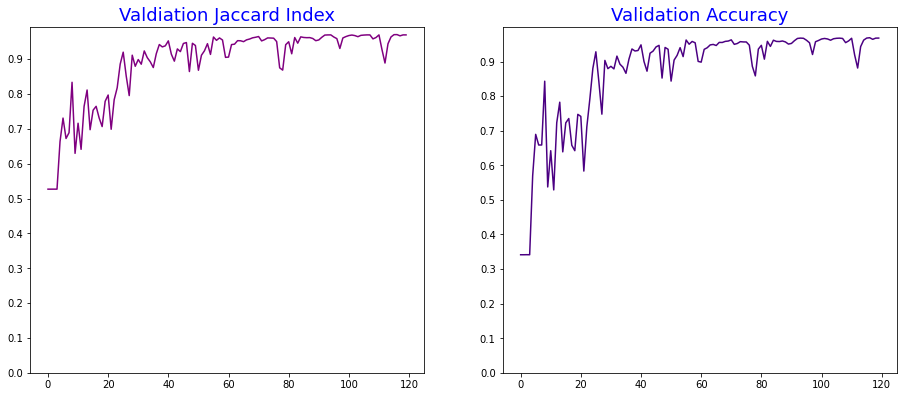

In [86]:
plt.figure(figsize=(24, 14))

plt.subplot(2,3,5)
plt.plot(hist.history['val_iou'], 'purple')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Valdiation Jaccard Index',fontsize = 18, color='blue')
plt.subplot(2,3,6)
plt.plot(hist.history['val_accuracy'], 'indigo')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Validation Accuracy',fontsize = 18, color='blue')
plt.show()

### Shown the  Predictions

We  trained  model on the training data and  will make predictions on the unseen data which is test data

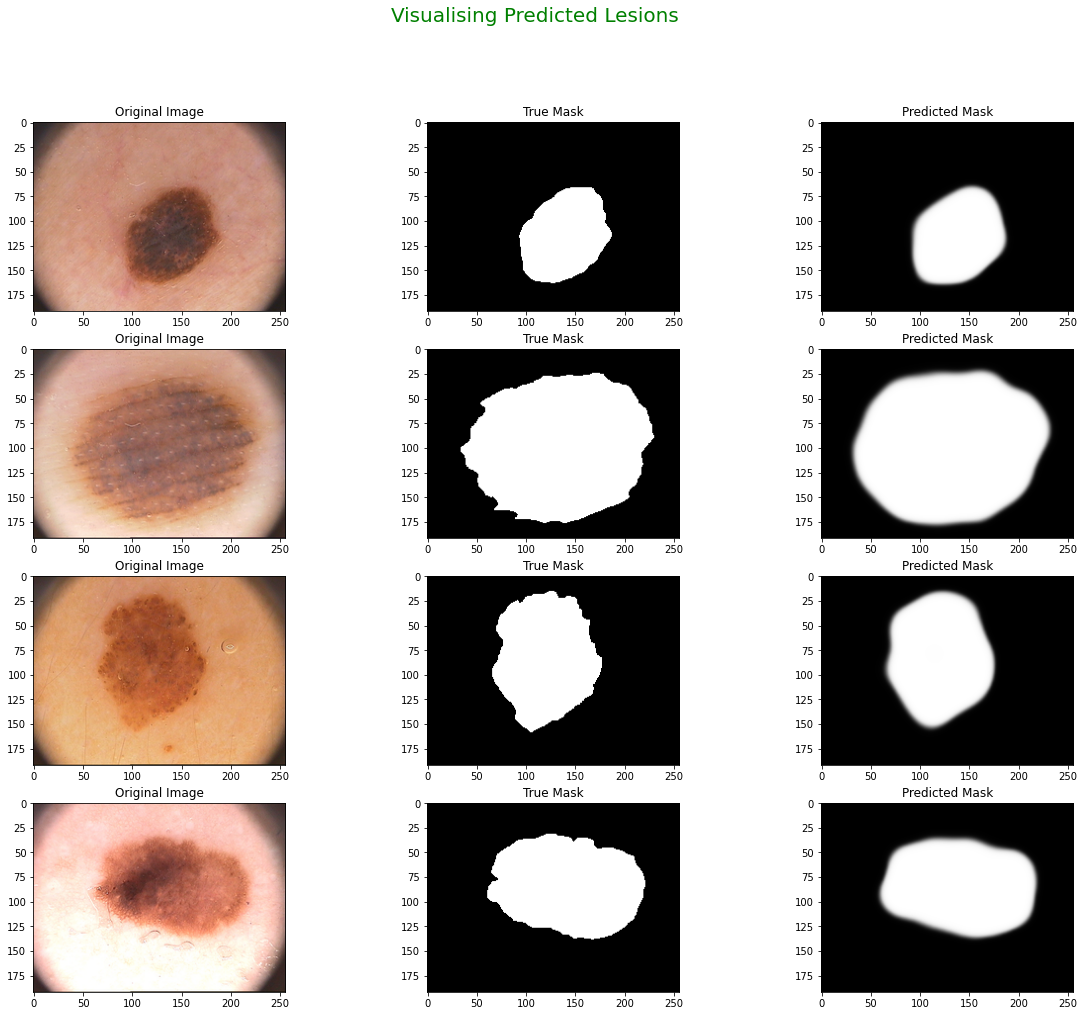

In [88]:
plt.figure(figsize=(20,16))

plt.suptitle('Visualising Predicted Lesions', fontsize = 20, color='green')

img_pred = model_1.predict(x_test[49].reshape(1,192,256,3))
plt.subplot(4,3,1)
plt.imshow(x_test[49])
plt.title('Original Image')
plt.subplot(4,3,2)
plt.imshow(y_test[49], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,3)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

img_pred = model_1.predict(x_test[36].reshape(1,192,256,3))
plt.subplot(4,3,4)
plt.imshow(x_test[36])
plt.title('Original Image')
plt.subplot(4,3,5)
plt.imshow(y_test[36], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,6)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

img_pred = model_1.predict(x_test[32].reshape(1,192,256,3))
plt.subplot(4,3,7)
plt.imshow(x_test[32])
plt.title('Original Image')
plt.subplot(4,3,8)
plt.imshow(y_test[32], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,9)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

img_pred = model_1.predict(x_test[21].reshape(1,192,256,3))
plt.subplot(4,3,10)
plt.imshow(x_test[21])
plt.title('Original Image')
plt.subplot(4,3,11)
plt.imshow(y_test[21], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,12)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

plt.show()

### Predicted lessons enhance

* We can see that the predicted masks are blurry because the pixels are in the range 0 - 1.
* To clear edge  we now enhance our image by rounding up the pixels to 1 which are > 0.5 . Now  We can see the  enhanced image to look for absolute shape.

In [90]:
def enhance(img):
    sub = (model_1.predict(img.reshape(1,192,256,3))).flatten()

    for i in range(len(sub)):
        if sub[i] > 0.5:
            sub[i] = 1
        else:
            sub[i] = 0
    return sub

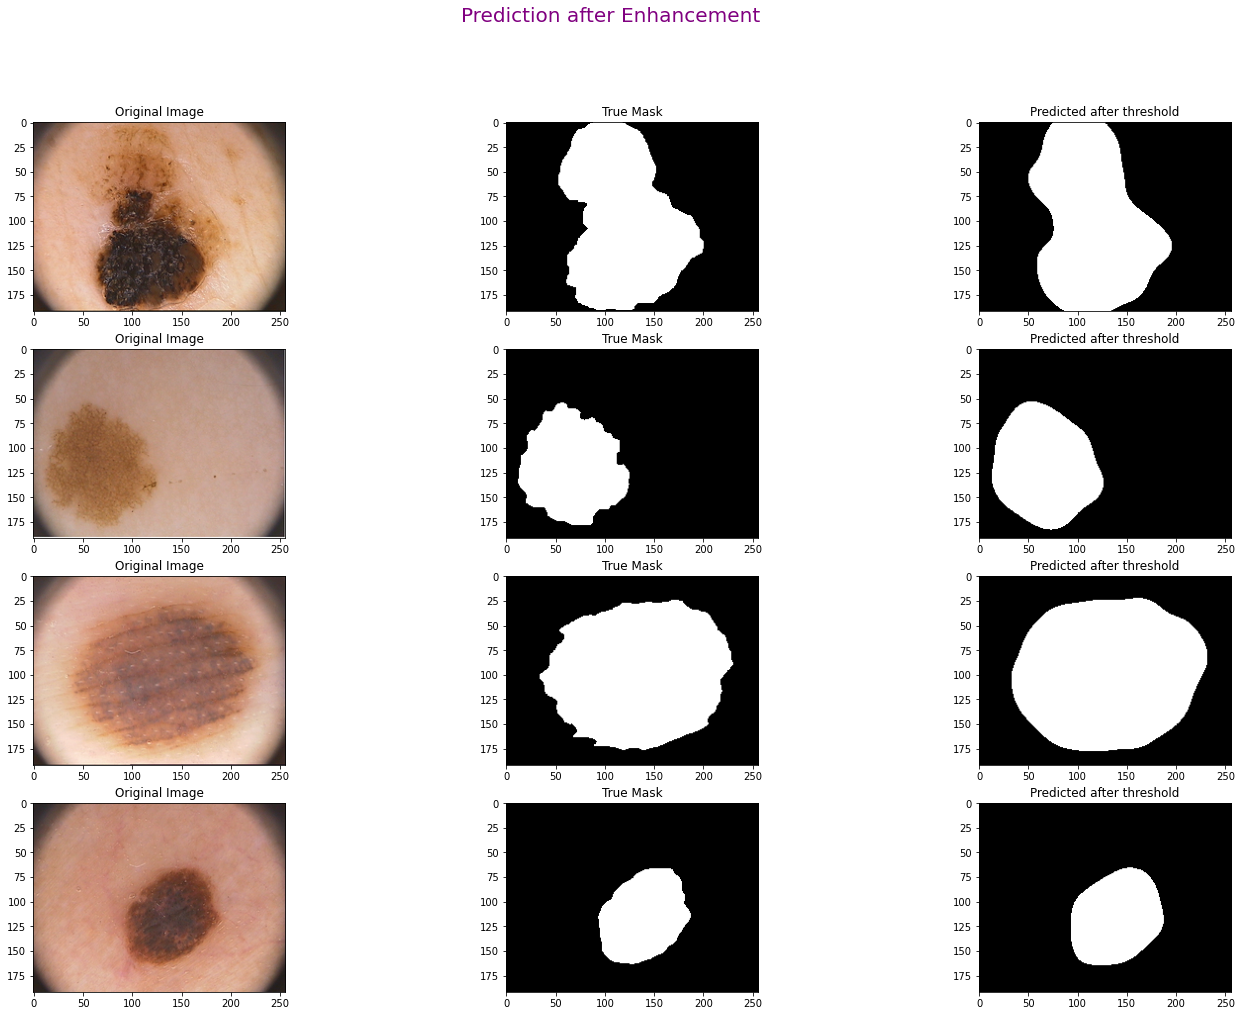

In [93]:
plt.figure(figsize=(24,16))

plt.suptitle('Prediction after Enhancement', fontsize = 20, color='purple')

plt.subplot(4,3,1)
plt.imshow(x_test[22])
plt.title('Original Image')
plt.subplot(4,3,2)
plt.imshow(y_test[22],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,3)
plt.imshow(enhance(x_test[22]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')

plt.subplot(4,3,4)
plt.imshow(x_test[19])
plt.title('Original Image')
plt.subplot(4,3,5)
plt.imshow(y_test[19],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,6)
plt.imshow(enhance(x_test[19]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')

plt.subplot(4,3,7)
plt.imshow(x_test[36])
plt.title('Original Image')
plt.subplot(4,3,8)
plt.imshow(y_test[36],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,9)
plt.imshow(enhance(x_test[36]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')


plt.subplot(4,3,10)
plt.imshow(x_test[49])
plt.title('Original Image')
plt.subplot(4,3,11)
plt.imshow(y_test[49],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,12)
plt.imshow(enhance(x_test[49]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')

plt.show()